In [1]:
print("Hello world")

Hello world


In [2]:
print("Hellk;.")

Hellk;.


In [1]:
import pandas as pd

In [2]:
retail=pd.read_csv("retail_store_inventory.csv")
retail.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               66.16      Autumn  
2             Sunny                  1               31.32      Summer  
3            Cloudy                  1               34.74      Autumn  
4             Sunny                  0               68.95      Summer

In [3]:
retail.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [4]:
retail.shape

(73100, 15)

In [6]:
retail.duplicated().sum()

0

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

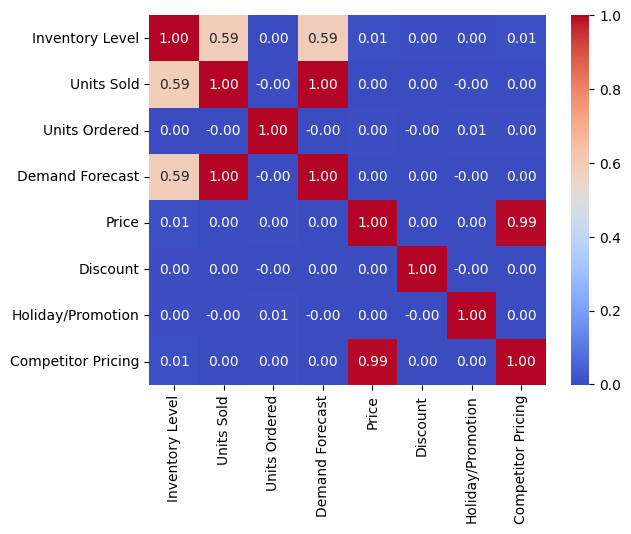

In [11]:
numeric=retail.select_dtypes(include='number')
corr_matrix=numeric.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [12]:
retail.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

In [13]:
retail['Demand Forecast']

0        135.47
1        144.04
2         74.02
3         62.18
4          9.26
          ...  
73095     18.46
73096     48.43
73097     39.65
73098    270.52
73099      2.33
Name: Demand Forecast, Length: 73100, dtype: float64

  Store ID  Product Count
0     S001          14620
1     S002          14620
2     S003          14620
3     S004          14620
4     S005          14620


C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\3907986097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_product_counts, x="Store ID", y="Product Count", palette="coolwarm")


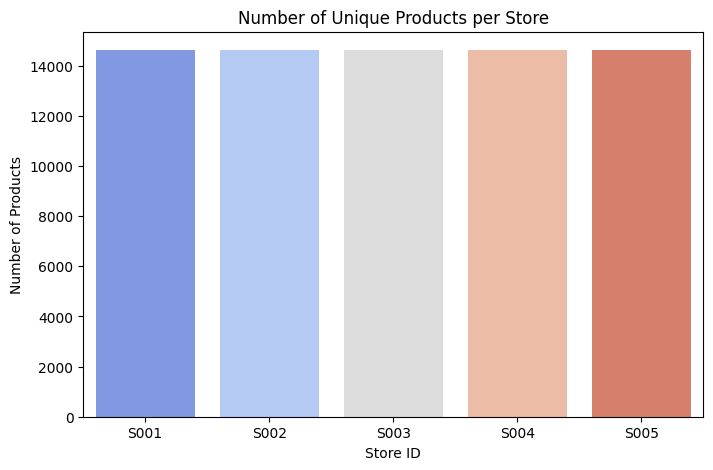

In [19]:
store_product_counts = retail.groupby("Store ID")["Product ID"].count().reset_index()
store_product_counts.columns = ["Store ID", "Product Count"]
print(store_product_counts.head())
plt.figure(figsize=(8, 5))
sns.barplot(data=store_product_counts, x="Store ID", y="Product Count", palette="coolwarm")
plt.title("Number of Unique Products per Store")
plt.xlabel("Store ID")
plt.ylabel("Number of Products")
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\2600862282.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retail, x="Product ID", y="Units Sold", palette="viridis")


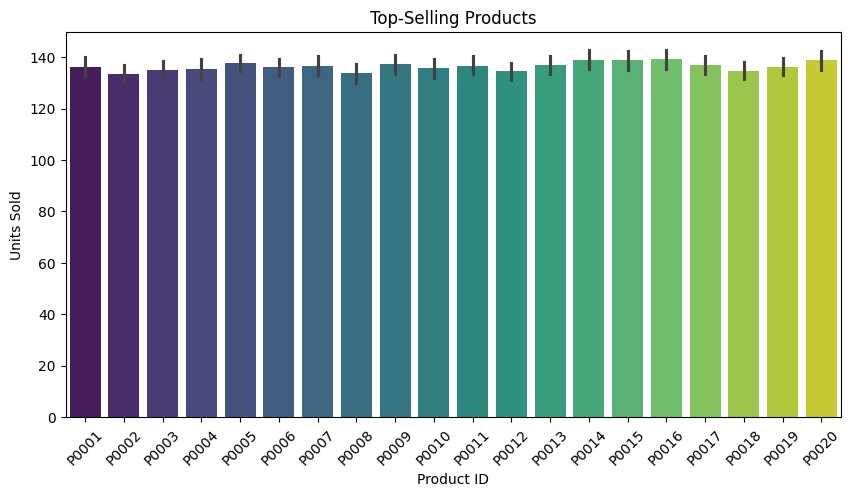

C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\2600862282.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retail, x="Store ID", y="Units Sold", palette="coolwarm")


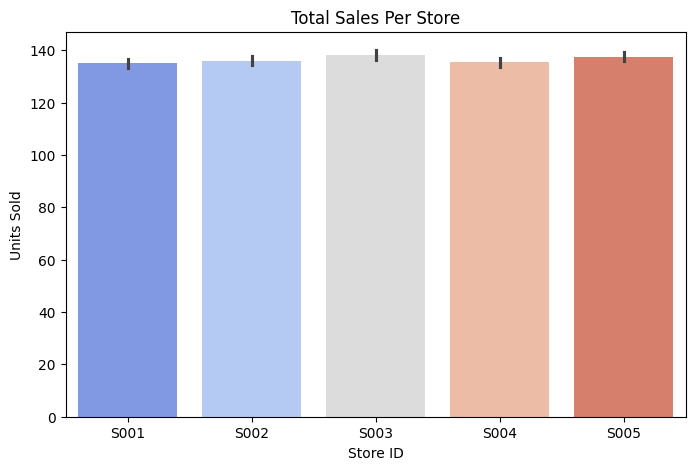

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Top-selling products
plt.figure(figsize=(10, 5))
sns.barplot(data=retail, x="Product ID", y="Units Sold", palette="viridis")
plt.title("Top-Selling Products")
plt.xticks(rotation=45)
plt.show()

# Store Performance
plt.figure(figsize=(8, 5))
sns.barplot(data=retail, x="Store ID", y="Units Sold", palette="coolwarm")
plt.title("Total Sales Per Store")
plt.show()


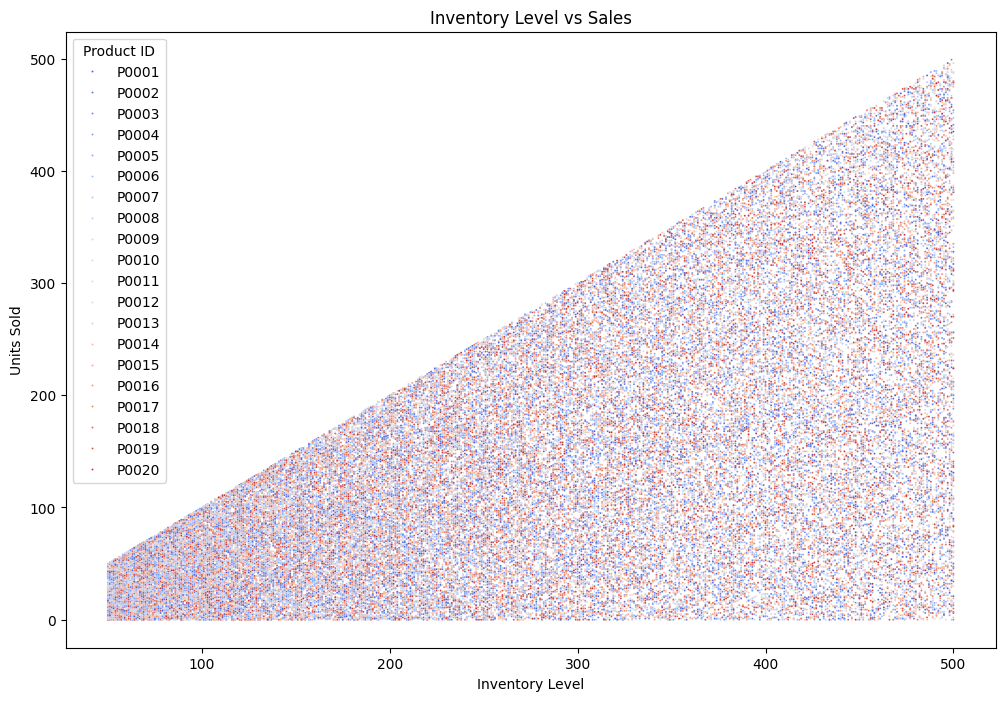

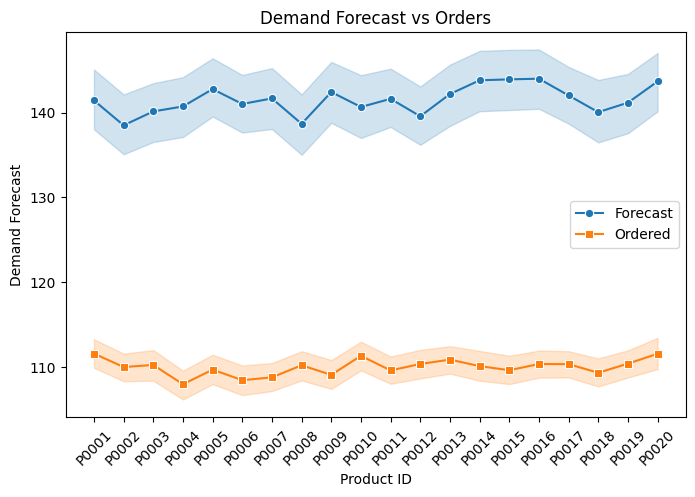

In [24]:
# Inventory Level vs Units Sold
plt.figure(figsize=(12, 8))
sns.scatterplot(data=retail, x="Inventory Level", y="Units Sold", hue="Product ID",s=2, palette="coolwarm")
plt.title("Inventory Level vs Sales")
plt.show()

# Demand Forecast vs Orders
plt.figure(figsize=(8, 5))
sns.lineplot(data=retail, x="Product ID", y="Demand Forecast", label="Forecast", marker="o")
sns.lineplot(data=retail, x="Product ID", y="Units Ordered", label="Ordered", marker="s")
plt.title("Demand Forecast vs Orders")
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


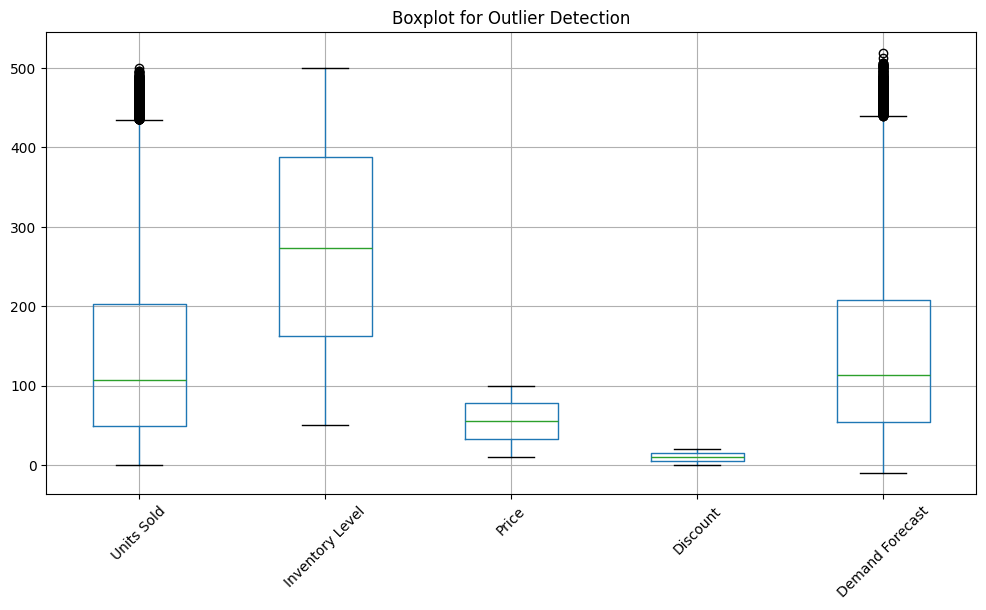

In [27]:

num_cols = ["Units Sold", "Inventory Level", "Price", "Discount", "Demand Forecast"]

plt.figure(figsize=(12, 6))
retail[num_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()


In [28]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25%)
    Q3 = data[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

for col in num_cols:
    outliers = detect_outliers_iqr(retail, col)
    print(f"Outliers in {col}:\n", outliers, "\n")


Outliers in Units Sold:
              Date Store ID Product ID     Category Region  Inventory Level  \
102    2022-01-02     S001      P0003     Clothing  South              488   
138    2022-01-02     S002      P0019         Toys   East              492   
195    2022-01-02     S005      P0016    Groceries   East              487   
322    2022-01-04     S002      P0003         Toys  North              493   
554    2022-01-06     S003      P0015    Furniture  North              490   
...           ...      ...        ...          ...    ...              ...   
72428  2023-12-26     S002      P0009     Clothing  South              485   
72485  2023-12-26     S005      P0006    Groceries   West              498   
72567  2023-12-27     S004      P0008    Furniture   East              493   
72884  2023-12-30     S005      P0005    Furniture   East              498   
73060  2024-01-01     S004      P0001  Electronics   East              497   

       Units Sold  Units Ordered  Dema

C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\912326061.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retail, x="Region", y="Units Sold", palette="viridis")


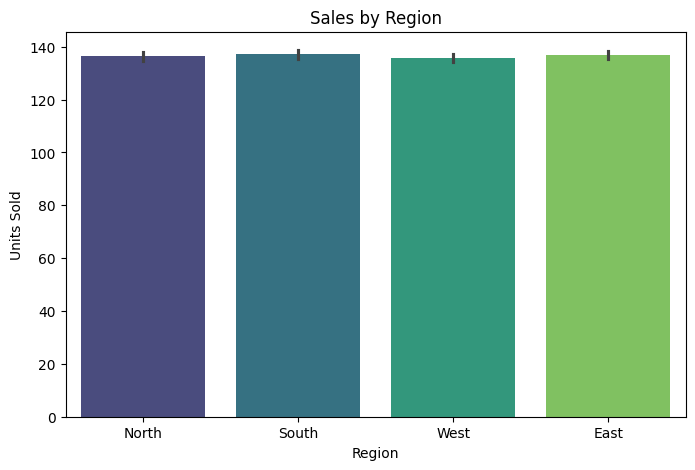

C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\912326061.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=retail, x="Seasonality", y="Units Sold", marker="o", palette="coolwarm")


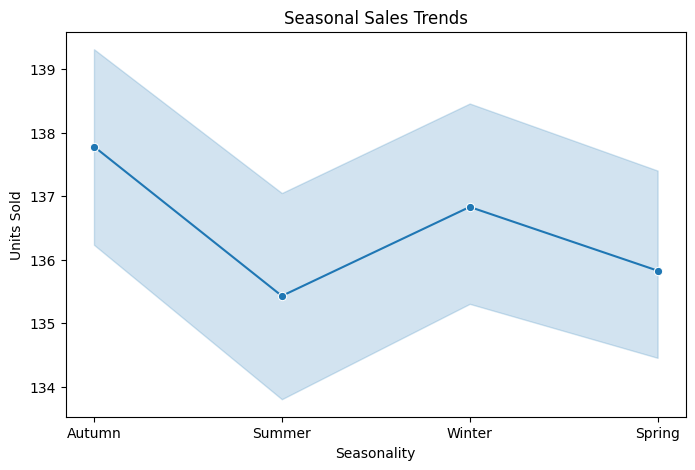

C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\912326061.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=retail, x="Weather Condition", y="Units Sold", palette="coolwarm")


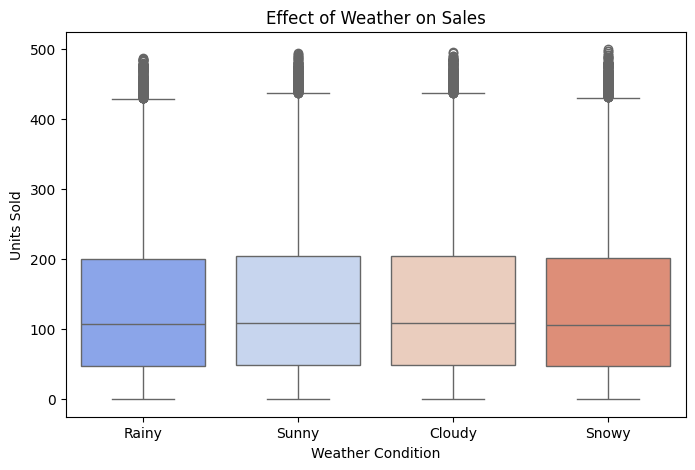

In [29]:
# Sales by Region
plt.figure(figsize=(8, 5))
sns.barplot(data=retail, x="Region", y="Units Sold", palette="viridis")
plt.title("Sales by Region")
plt.show()

# Seasonality Effect
plt.figure(figsize=(8, 5))
sns.lineplot(data=retail, x="Seasonality", y="Units Sold", marker="o", palette="coolwarm")
plt.title("Seasonal Sales Trends")
plt.show()

# Weather Impact
plt.figure(figsize=(8, 5))
sns.boxplot(data=retail, x="Weather Condition", y="Units Sold", palette="coolwarm")
plt.title("Effect of Weather on Sales")
plt.show()


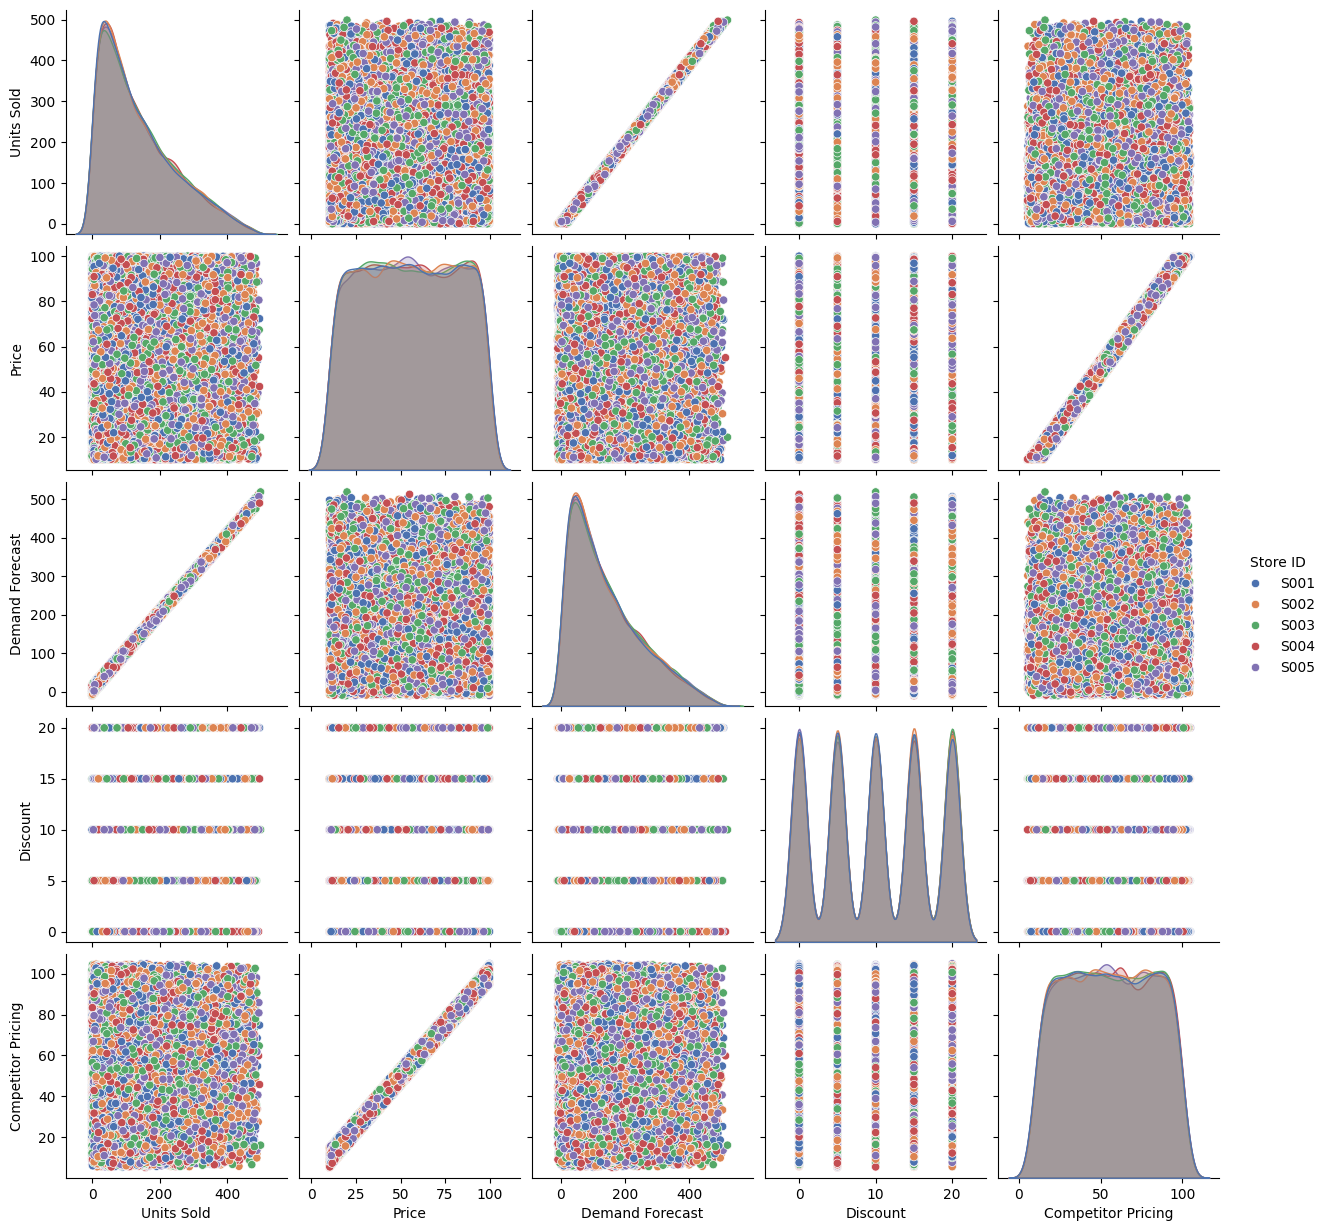

In [31]:
selected_columns = ["Units Sold", "Price", "Demand Forecast", "Discount", "Competitor Pricing", "Store ID"]
sns.pairplot(data=retail[selected_columns], hue='Store ID', palette='deep')
plt.show()


C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\1709169709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_sales, x="Store ID", y="Units Sold", palette="coolwarm")


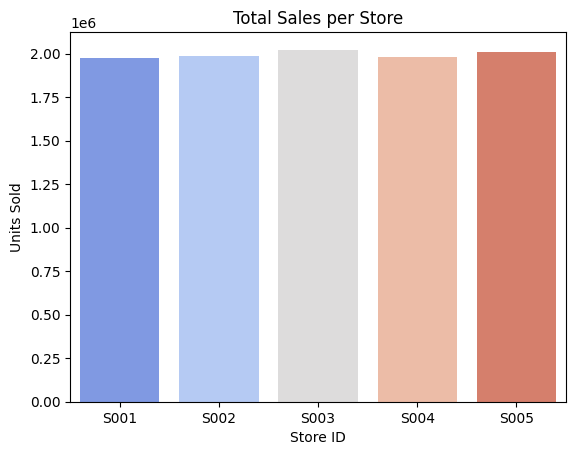

In [32]:
store_sales = retail.groupby("Store ID")["Units Sold"].sum().reset_index()
sns.barplot(data=store_sales, x="Store ID", y="Units Sold", palette="coolwarm")
plt.title("Total Sales per Store")
plt.show()


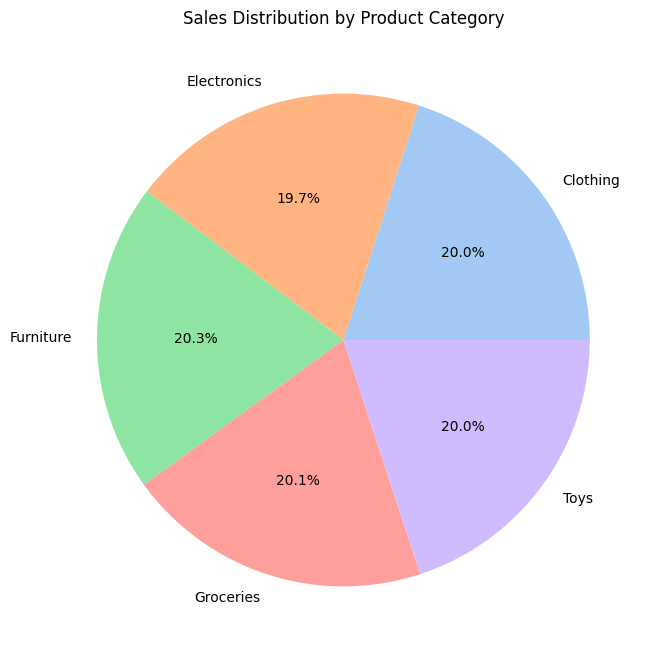

In [33]:
# Aggregate total sales per category
category_sales = retail.groupby("Category")["Units Sold"].sum()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct="%1.1f%%", colors=sns.color_palette("pastel", len(category_sales)))
plt.title("Sales Distribution by Product Category")
plt.show()


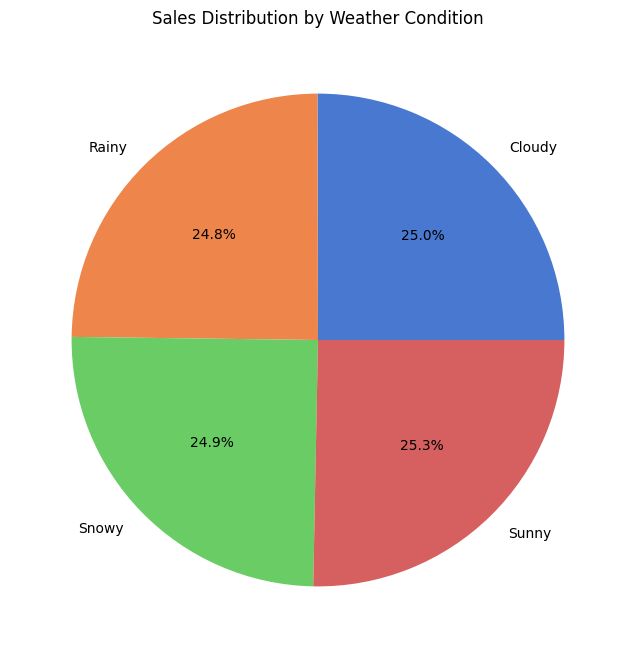

In [35]:
# Aggregate sales by weather condition
weather_sales = retail.groupby("Weather Condition")["Units Sold"].sum()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_sales, labels=weather_sales.index, autopct="%1.1f%%", colors=sns.color_palette("muted", len(weather_sales)))
plt.title("Sales Distribution by Weather Condition")
plt.show()


C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\187942820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retail, x="Holiday/Promotion", y="Units Sold", palette="Set2")


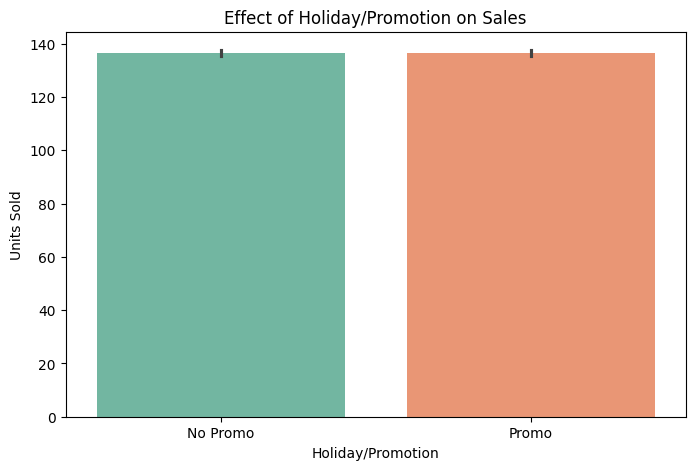

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(data=retail, x="Holiday/Promotion", y="Units Sold", palette="Set2")
plt.xticks([0, 1], ["No Promo", "Promo"])
plt.title("Effect of Holiday/Promotion on Sales")
plt.show()


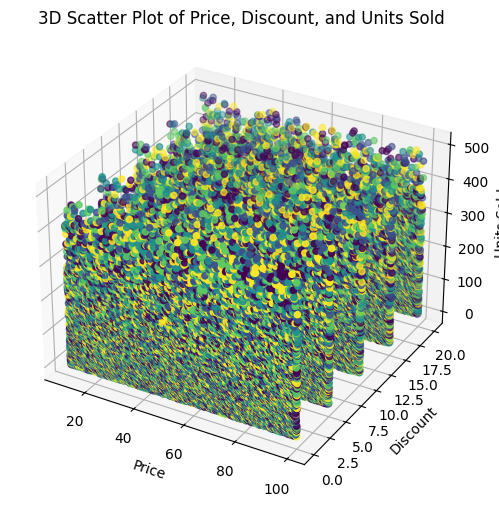

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(retail["Price"], retail["Discount"], retail["Units Sold"], c=retail["Store ID"].astype('category').cat.codes, cmap="viridis")

ax.set_xlabel("Price")
ax.set_ylabel("Discount")
ax.set_zlabel("Units Sold")
plt.title("3D Scatter Plot of Price, Discount, and Units Sold")
plt.show()


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define independent variables (features) and dependent variable (target)
X = retail[["Price", "Discount", "Inventory Level", "Demand Forecast"]]
y = retail["Units Sold"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Display coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coefficients)


                 Coefficient
Price               0.002879
Discount            0.000207
Inventory Level     0.003931
Demand Forecast     0.991126


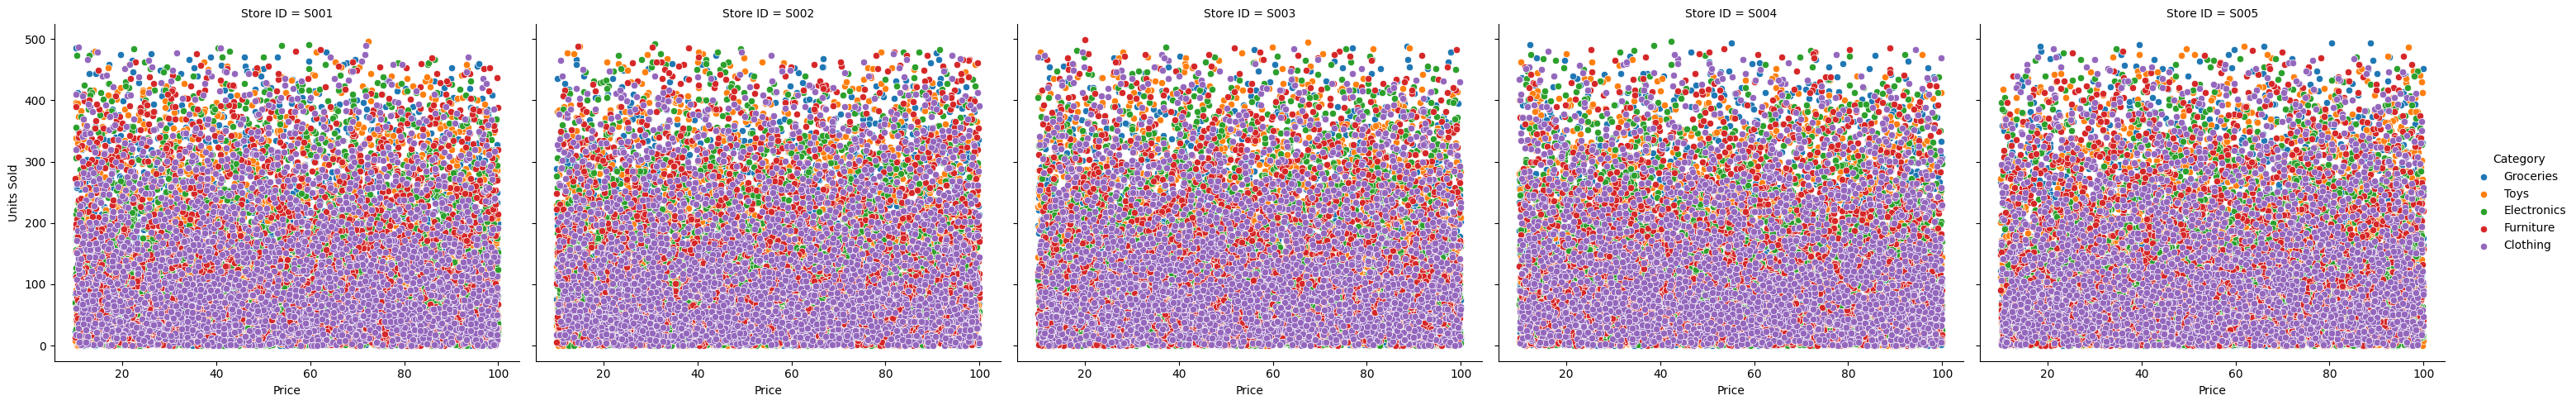

In [40]:
g = sns.FacetGrid(retail, col="Store ID", hue="Category", height=5, aspect=1.2)
g.map(sns.scatterplot, "Price", "Units Sold")
g.add_legend()
g.set_axis_labels("Price", "Units Sold")
plt.show()


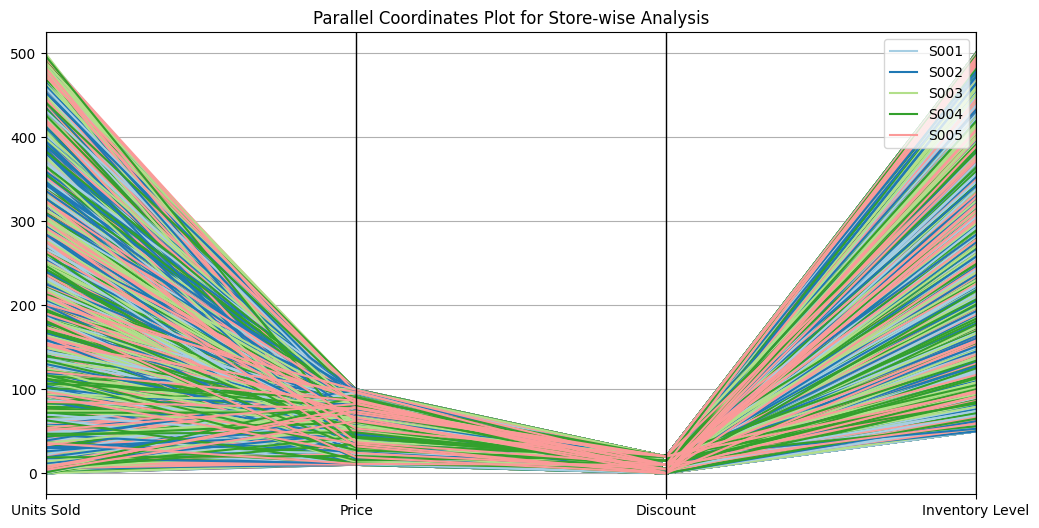

In [41]:
from pandas.plotting import parallel_coordinates

# Create a subset of the dataset for categorical columns and numerical columns
subset = retail[["Store ID", "Units Sold", "Price", "Discount", "Inventory Level"]]

# Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(subset, class_column="Store ID", cols=subset.columns[1:], color=plt.cm.Paired.colors)
plt.title("Parallel Coordinates Plot for Store-wise Analysis")
plt.show()


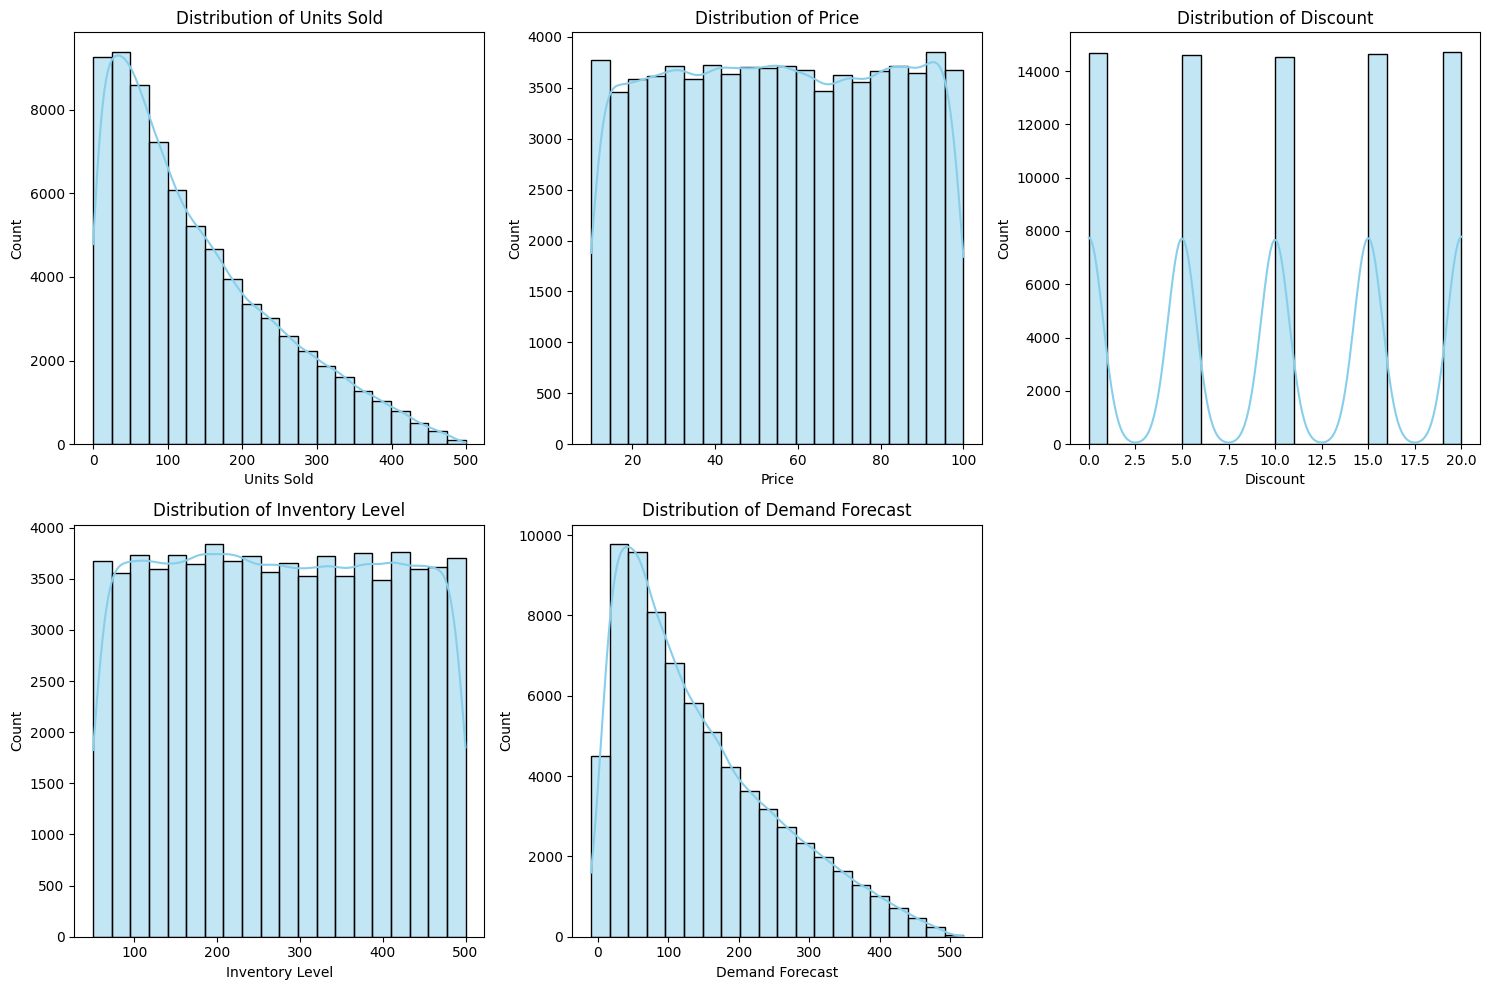

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ['Units Sold', 'Price', 'Discount', 'Inventory Level', 'Demand Forecast']

plt.figure(figsize=(15, 10))

# Create histograms for continuous variables
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(retail[var], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {var}")

plt.tight_layout()
plt.show()


In [43]:
# Descriptive statistics for continuous variables
desc_stats = retail[continuous_vars].describe().T
desc_stats['IQR'] = desc_stats['75%'] - desc_stats['25%']
desc_stats = desc_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']]
print(desc_stats)


                       mean         std    min     25%      50%       75%  \
Units Sold       136.464870  108.919406   0.00   49.00  107.000  203.0000   
Price             55.135108   26.021945  10.00   32.65   55.050   77.8600   
Discount          10.009508    7.083746   0.00    5.00   10.000   15.0000   
Inventory Level  274.469877  129.949514  50.00  162.00  273.000  387.0000   
Demand Forecast  141.494720  109.254076  -9.99   53.67  113.015  208.0525   

                    max       IQR  
Units Sold       499.00  154.0000  
Price            100.00   45.2100  
Discount          20.00   10.0000  
Inventory Level  500.00  225.0000  
Demand Forecast  518.55  154.3825  


C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\3237411426.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=retail, x=var, palette="Set2")
C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\3237411426.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=retail, x=var, palette="Set2")
C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\3237411426.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=retail, x=var, palette="Set2")
C:\Users\CVR\AppData\Local\Temp\ipykernel_18656\3237411426.py:9: FutureWarning: 

Passing `palette` 

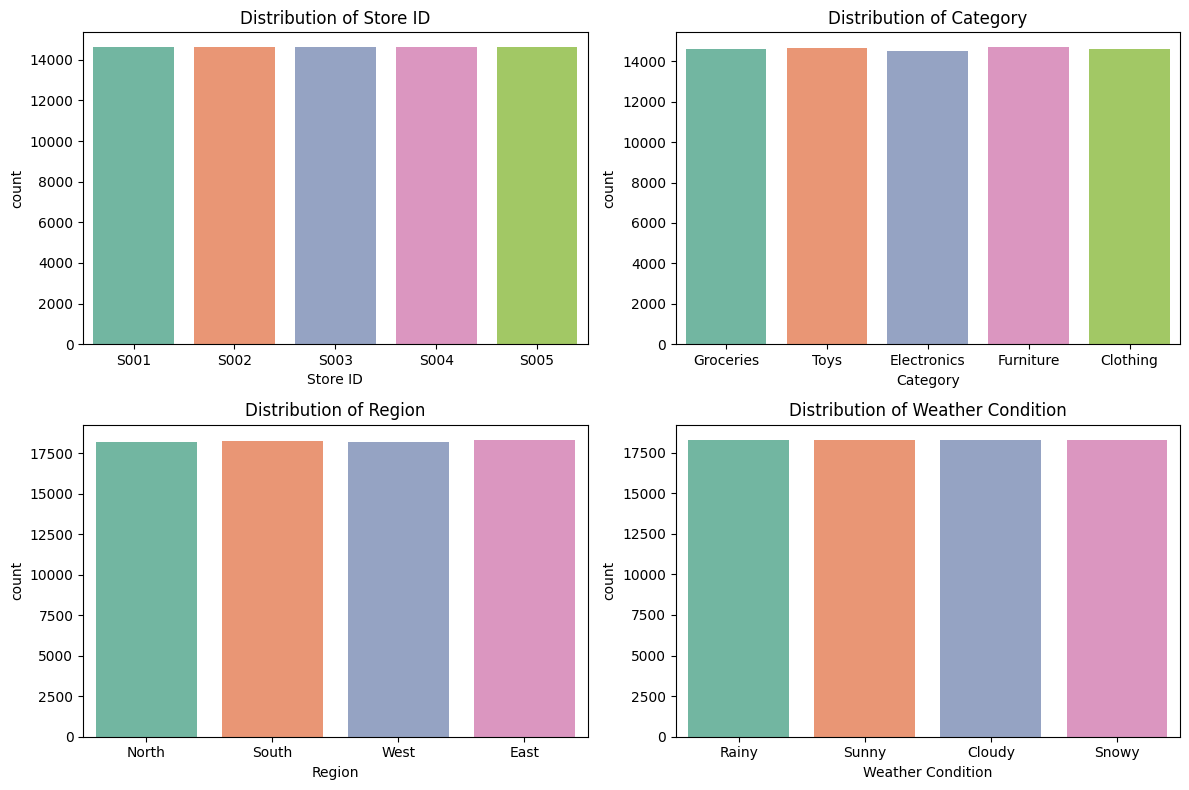

In [44]:
# Categorical variables for analysis
categorical_vars = ['Store ID', 'Category', 'Region', 'Weather Condition']

plt.figure(figsize=(12, 8))

# Plotting bar charts for categorical variables
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=retail, x=var, palette="Set2")
    plt.title(f"Distribution of {var}")

plt.tight_layout()
plt.show()


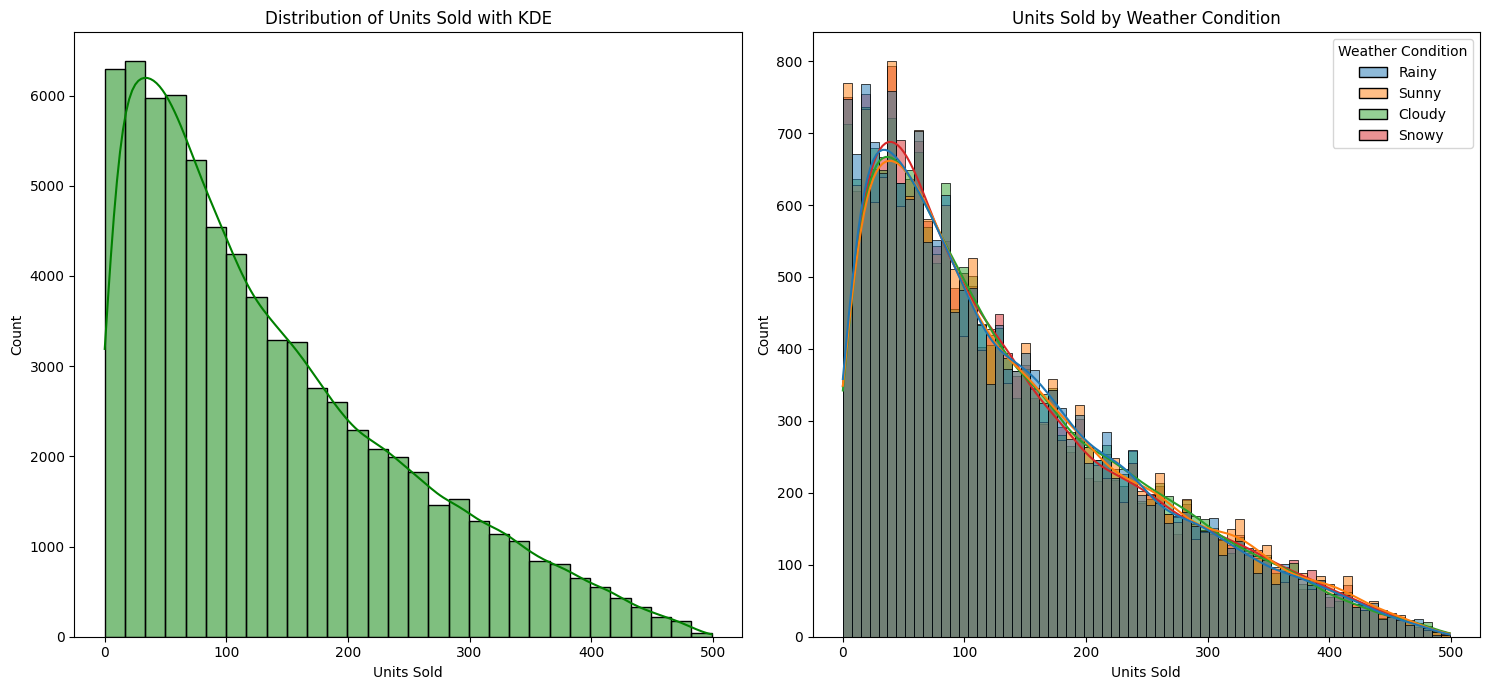

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Histogram and KDE for Units Sold
plt.subplot(121)
sns.histplot(data=retail, x='Units Sold', bins=30, kde=True, color='g')
plt.title('Distribution of Units Sold with KDE')

# Plot 2: Histogram and KDE for Units Sold, categorized by Weather Condition
plt.subplot(122)
sns.histplot(data=retail, x='Units Sold', kde=True, hue='Weather Condition')
plt.title('Units Sold by Weather Condition')

# Show the plots
plt.tight_layout()
plt.show()


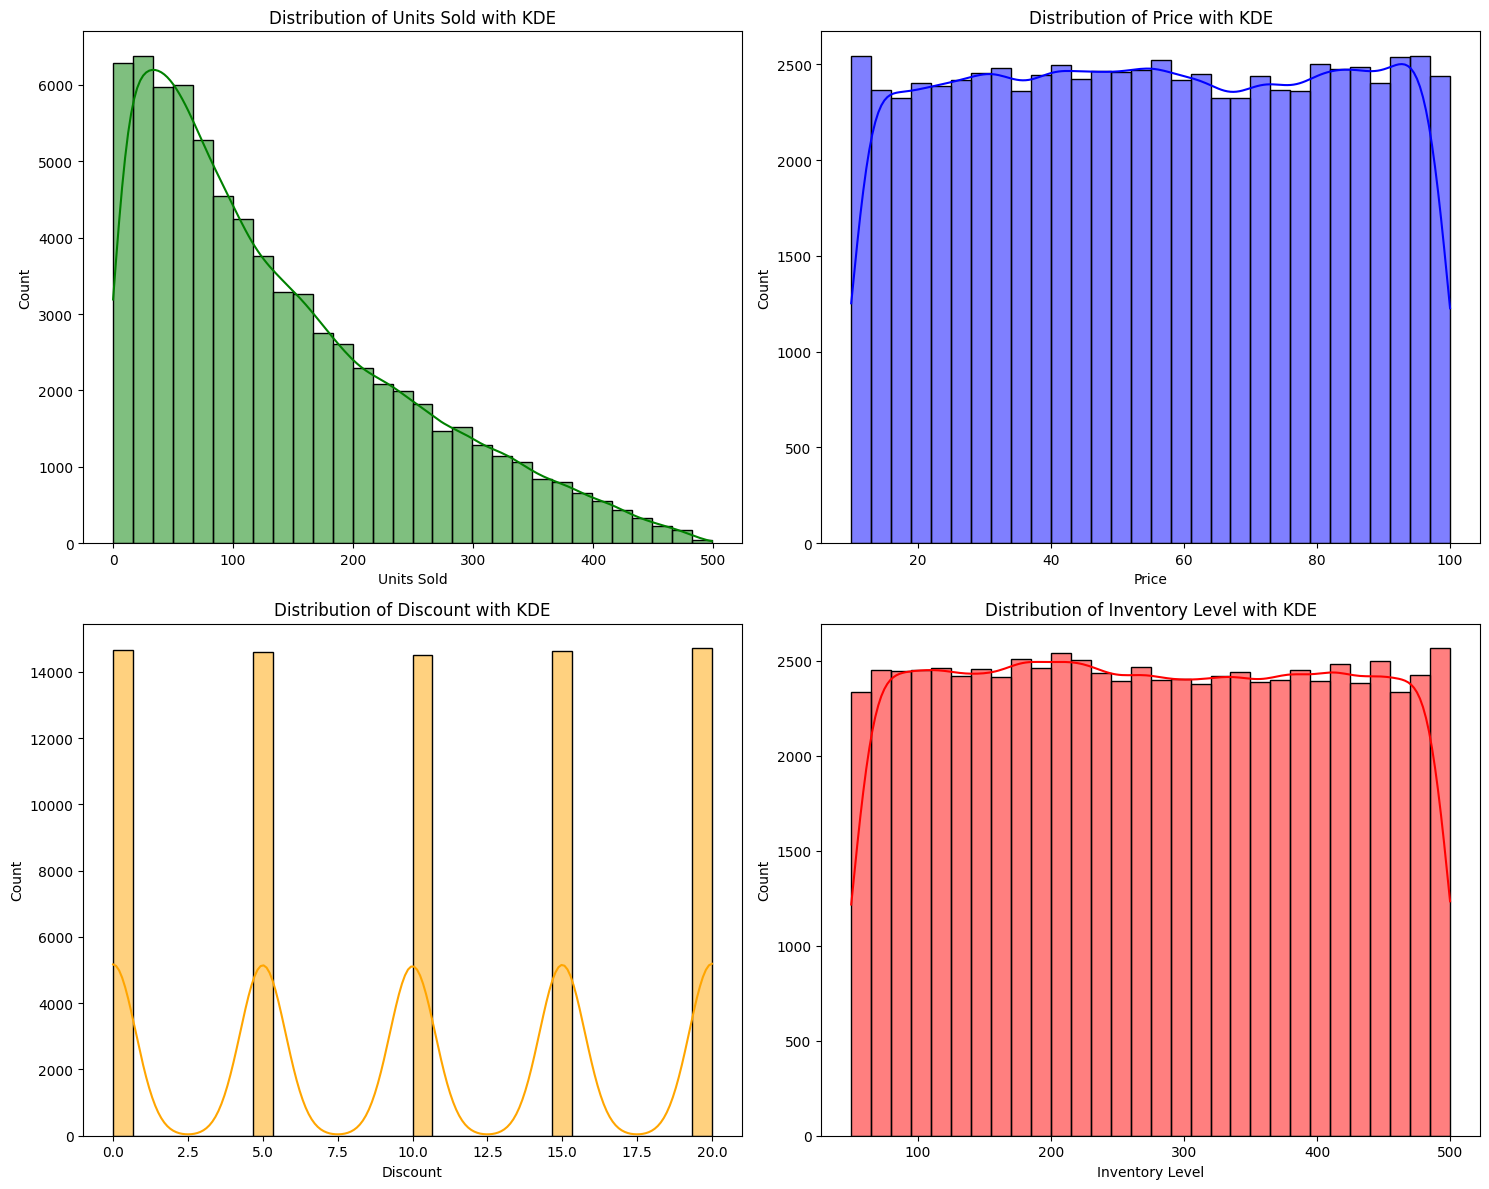

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Histogram and KDE for Units Sold
plt.subplot(221)
sns.histplot(data=retail, x='Units Sold', bins=30, kde=True, color='g')
plt.title('Distribution of Units Sold with KDE')

# Plot 2: Histogram and KDE for Price
plt.subplot(222)
sns.histplot(data=retail, x='Price', bins=30, kde=True, color='blue')
plt.title('Distribution of Price with KDE')

# Plot 3: Histogram and KDE for Discount
plt.subplot(223)
sns.histplot(data=retail, x='Discount', bins=30, kde=True, color='orange')
plt.title('Distribution of Discount with KDE')

# Plot 4: Histogram and KDE for Inventory Level
plt.subplot(224)
sns.histplot(data=retail, x='Inventory Level', bins=30, kde=True, color='red')
plt.title('Distribution of Inventory Level with KDE')

# Show the plots
plt.tight_layout()
plt.show()


In [48]:
retail['Category'].unique()

array(['Groceries', 'Toys', 'Electronics', 'Furniture', 'Clothing'],
      dtype=object)

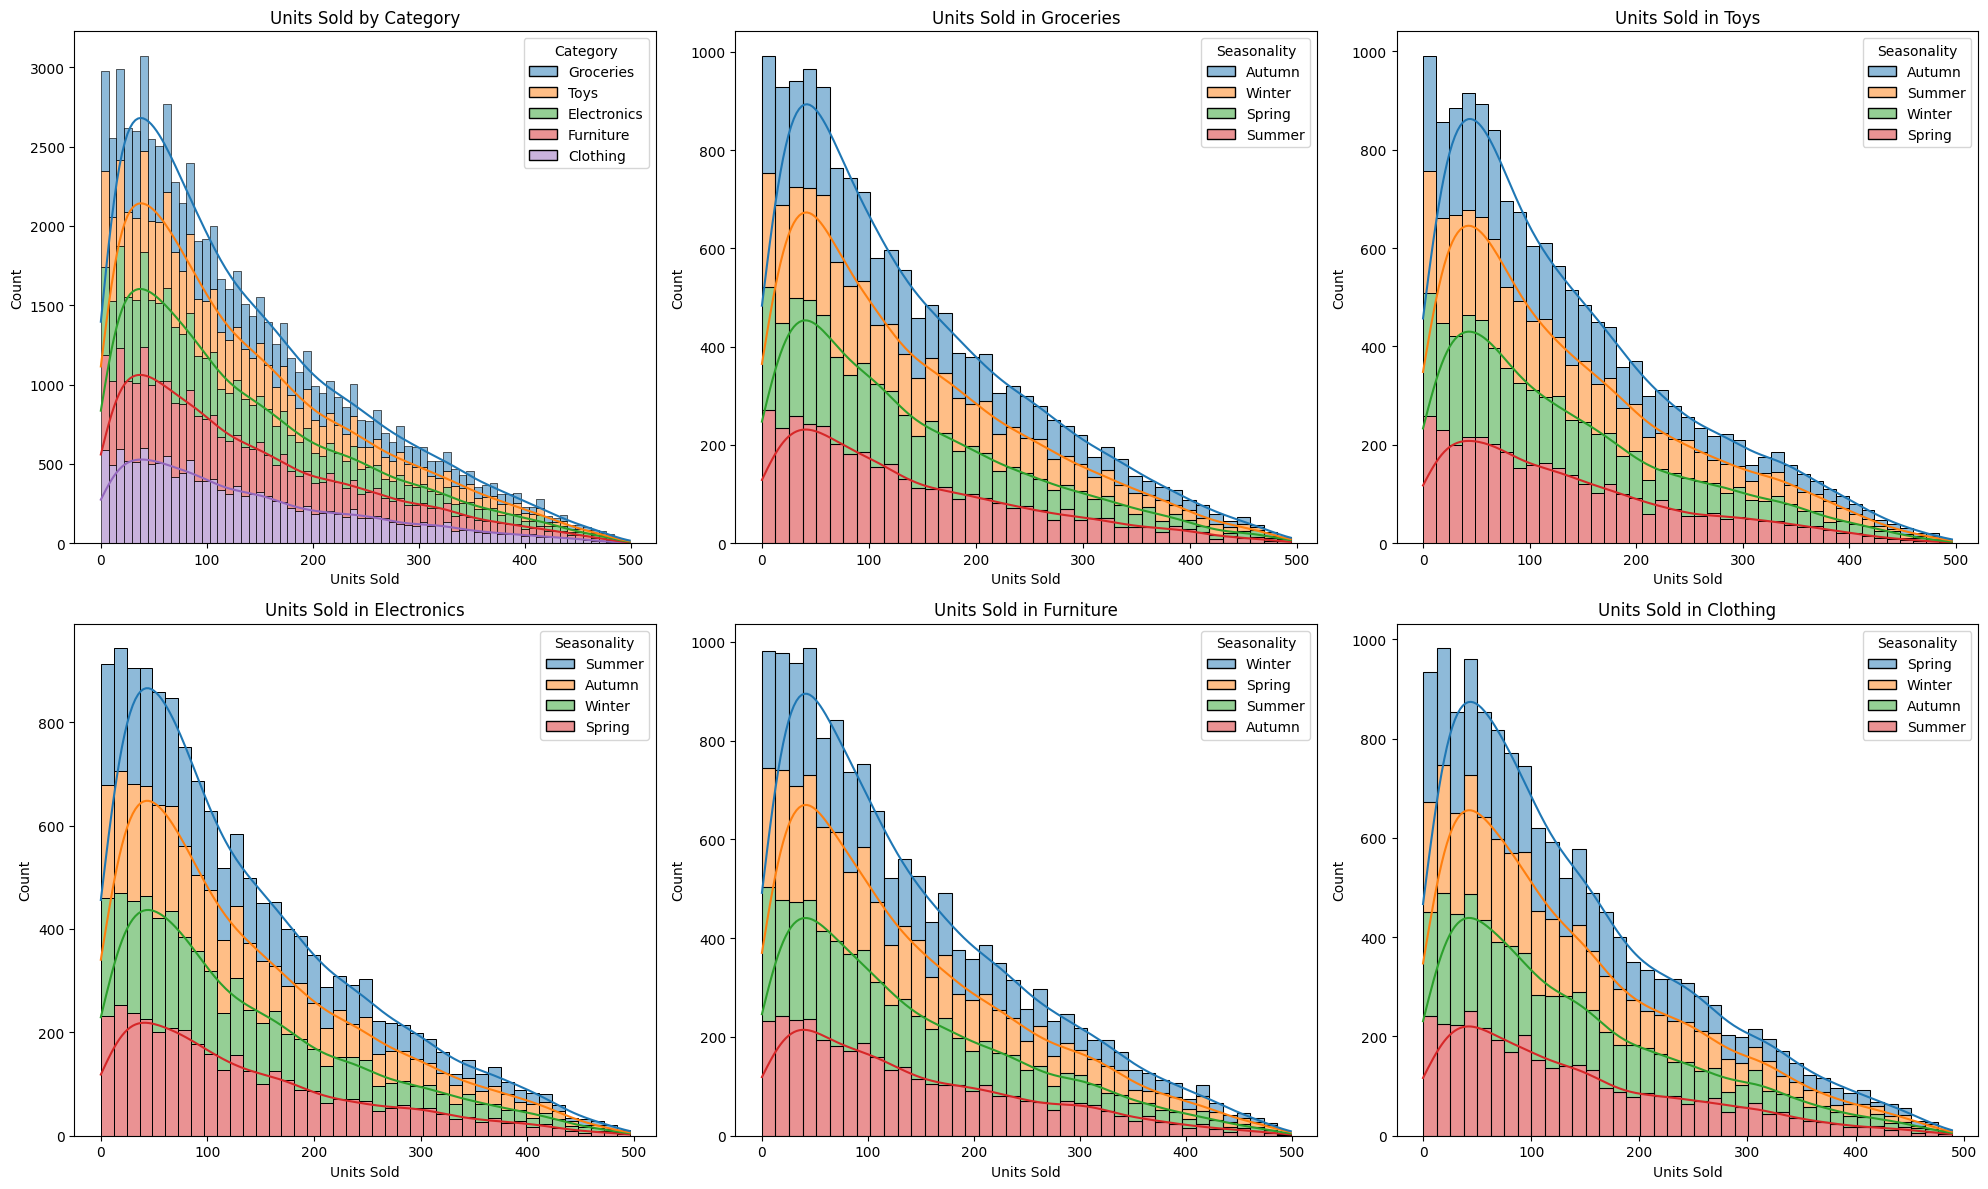

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplots for the categories (2 rows, 3 columns)
plt.figure(figsize=(20, 12))

# Plot 1: Distribution of Units Sold by Category
plt.subplot(2, 3, 1)
sns.histplot(data=retail, x='Units Sold', kde=True, hue='Category', multiple='stack')
plt.title('Units Sold by Category')

# Plot 2: Distribution of Units Sold for Groceries
plt.subplot(2, 3, 2)
sns.histplot(data=retail[retail.Category == 'Groceries'], x='Units Sold', kde=True, hue='Seasonality', multiple='stack')
plt.title('Units Sold in Groceries')

# Plot 3: Distribution of Units Sold for Toys
plt.subplot(2, 3, 3)
sns.histplot(data=retail[retail.Category == 'Toys'], x='Units Sold', kde=True, hue='Seasonality', multiple='stack')
plt.title('Units Sold in Toys')

# Plot 4: Distribution of Units Sold for Electronics
plt.subplot(2, 3, 4)
sns.histplot(data=retail[retail.Category == 'Electronics'], x='Units Sold', kde=True, hue='Seasonality', multiple='stack')
plt.title('Units Sold in Electronics')

# Plot 5: Distribution of Units Sold for Furniture
plt.subplot(2, 3, 5)
sns.histplot(data=retail[retail.Category == 'Furniture'], x='Units Sold', kde=True, hue='Seasonality', multiple='stack')
plt.title('Units Sold in Furniture')

# Plot 6: Distribution of Units Sold for Clothing (if applicable)
plt.subplot(2, 3, 6)
sns.histplot(data=retail[retail.Category == 'Clothing'], x='Units Sold', kde=True, hue='Seasonality', multiple='stack')
plt.title('Units Sold in Clothing')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [56]:
print("🔥 Sales Performance Report 📈")


🔥 Sales Performance Report 📈
